# Quantitative Exercise

The goal of this notebook is to practice quantitative data analysis using Numenta Anomaly Benchmark (NAB) dataset on Streaming Outlier Detection algorithm, in particular on SPOT (add reference). We will use three different datasets comprising of data retrieved from real world. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Load Data

We load the data directly from the csv files in pandas DataFrames, we check if there are some missing values and finally print a sample of the data

In [2]:
df = pd.read_csv('./data/ec2_sys_failure.csv')

In [3]:
print("Missing values: ", df.isnull().values.any())

Missing values:  False


In [4]:
df.head()

,timestamp,value
0,2014-03-07 03:41:00,45.868
1,2014-03-07 03:46:00,47.606
2,2014-03-07 03:51:00,42.580
3,2014-03-07 03:56:00,46.030
4,2014-03-07 04:01:00,44.992


## Exploratory Data Analysis

In this section we will explore the data in more detail. Firstly, we will plot data with different view to understand our dataset. Secondly, we will run our dataset over the SPOT algorithm to find outliers and derive more insights
### Descriptive Plotting

Basics dataset statistics

In [5]:
df.describe()

,value
count,4032.000000
mean,45.155874
std,2.287089
min,22.864000
25%,43.944000
50%,45.017000
75%,46.362000
max,99.248000


The dataset contains temperature data for a time period of 2 weeks

In [7]:
print(df['timestamp'].min())
print(df['timestamp'].max())

2014-03-07 03:41:00
2014-03-21 03:41:00


Convert data in the right format, DateTime type and values in Celsius

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

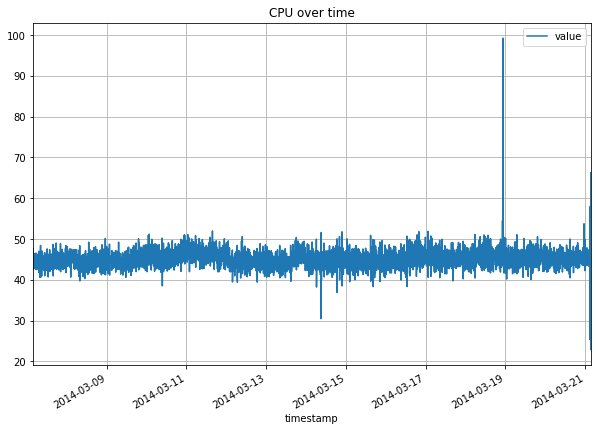

In [9]:
df.plot(x='timestamp', y='value', figsize=(10,7), title='CPU over time', grid=True)

In [10]:
df = df.set_index('timestamp')
df.index
df.sort_index(inplace=True)

Decomposing time series into components for further analysis, modeled as additive. 

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive = seasonal_decompose(df, model='additive', freq=1)
additive_df = pd.concat([additive.seasonal, additive.trend, additive.resid, additive.observed], axis=1)
additive_df.columns = ['seasonal', 'trend', 'resid', 'actual_values']
additive_df.head()

,seasonal,trend,resid,actual_values
timestamp,,,,
2014-03-07 03:41:00,0.0,45.868,0.0,45.868
2014-03-07 03:46:00,0.0,47.606,0.0,47.606
2014-03-07 03:51:00,0.0,42.580,0.0,42.580
2014-03-07 03:56:00,0.0,46.030,0.0,46.030
2014-03-07 04:01:00,0.0,44.992,0.0,44.992


Text(0.5, 0.98, 'Additive Decompose')

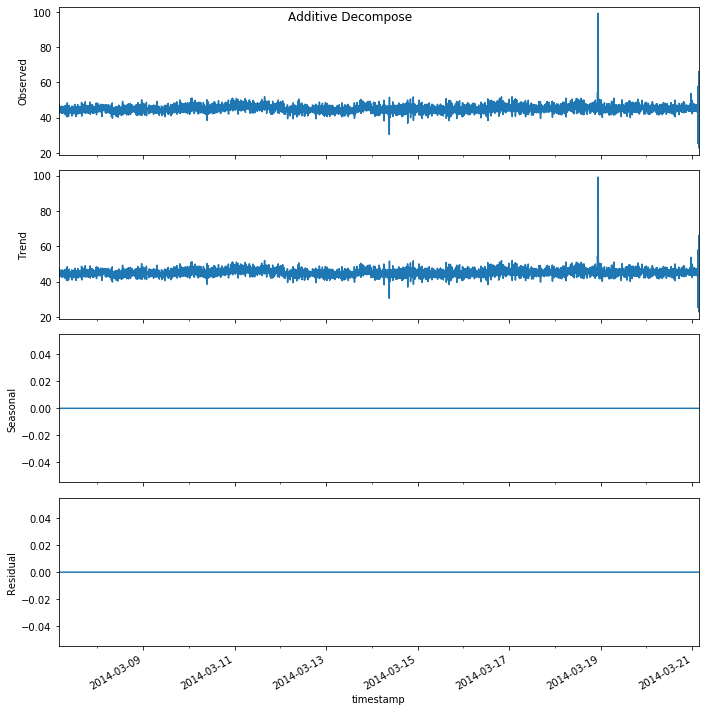

In [12]:
plt.rcParams.update({'figure.figsize': (10,10)})
additive.plot().suptitle('Additive Decompose')

In [13]:
df.reset_index(inplace=True)
df.head()

,timestamp,value
0,2014-03-07 03:41:00,45.868
1,2014-03-07 03:46:00,47.606
2,2014-03-07 03:51:00,42.580
3,2014-03-07 03:56:00,46.030
4,2014-03-07 04:01:00,44.992


In [14]:
df['year'] = df['timestamp'].apply(lambda x : x.year)
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['minute'] = df['timestamp'].apply(lambda x : x.minute)

df.index = df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)
df.head(3)

,value,year,month,day,hour,minute
timestamp,,,,,,
2014-03-07 03:41:00,45.868,2014,3,7,3,41
2014-03-07 03:46:00,47.606,2014,3,7,3,46
2014-03-07 03:51:00,42.580,2014,3,7,3,51


In [17]:
weekly = df['value'].resample('W').mean()
daily = df['value'].resample('D').mean()

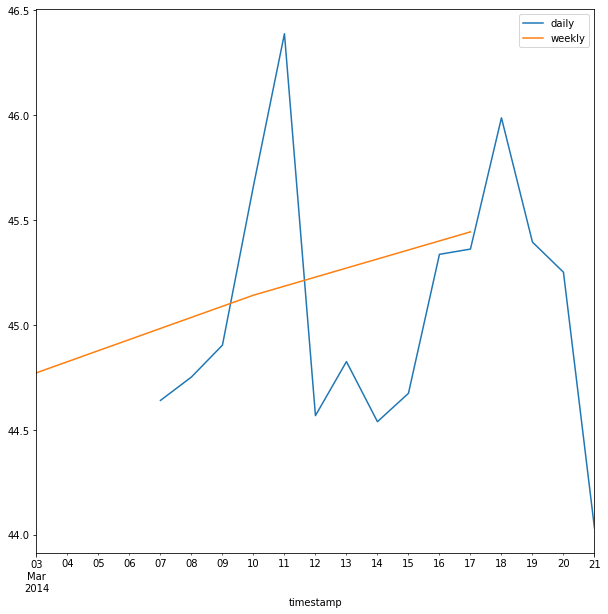

In [18]:
daily.plot()
weekly.plot()
plt.legend(["daily", "weekly", "monthly"])

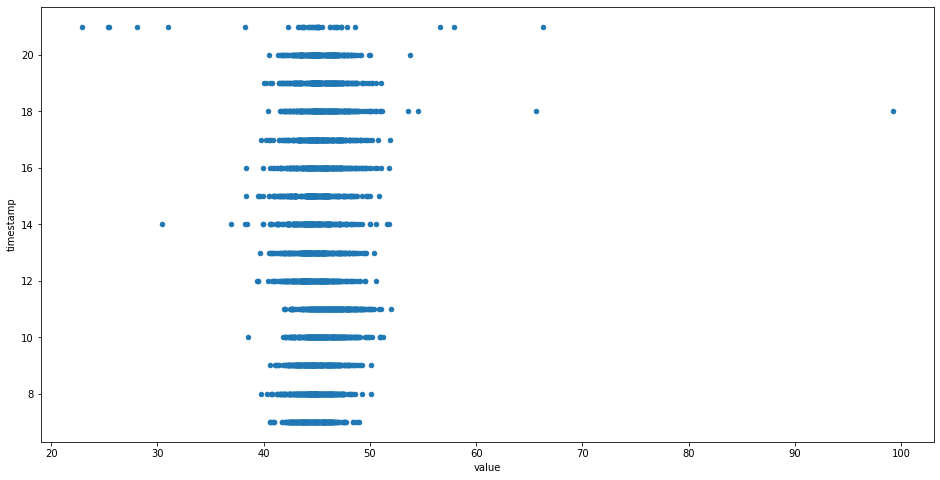

In [20]:
df_2 = pd.read_csv('./data/ec2_sys_failure.csv')
mon = df_2['timestamp']
temp = pd.DatetimeIndex(mon)
days = pd.Series(temp.day)
to_plot = df_2.drop(['timestamp'], axis=1)
to_plot = to_plot.join(days)

to_plot.plot.scatter(x='value',y='timestamp', figsize=(16,8))
plt.show()